# **🐤💚 Mini Projet : Prédiction de prochain hit du groupe de K-pop GOT7 💚🐤**

## 🐤 Auteur du Notebook : 
- Makoundou Chloé (Groupe IAS (Info) Jeudi matin)
- Chargé de TD : Sebastian Velut

## 🐤 Rapide Présentation de GOT7

GOT7 est un groupe de K-pop lancé en 2014 par JYP Entertainment, connu pour son style unique mêlant hip-hop et pop. Les sept membres captivent par leurs performances dynamiques et leur large popularité mondiale.

[Wikipédia de GOT7](https://fr.wikipedia.org/wiki/Got7)



## 🐤 Objectif 

Ce projet vise à prédire le succès commercial des chansons du groupe K-pop GOT7. En utilisant des techniques d'apprentissage automatique comme la régression logistique, le Perceptron et le SVM, nous explorerons comment les caractéristiques musicales d'une chanson influencent sa popularité. Nous aborderons également la réduction de dimensionnalité avec la PCA pour optimiser la classification.


## 🐤 Structure de la Base de Données
Pour chaque chanson de GOT7, on inclut plusieurs caractéristiques qui sont généralement liées au succès commercial d'une chanson et qui peuvent influencer sa popularité. Ces caractéristiques seront utilisées comme features (variables explicatives) pour prédire si une chanson sera un succès ou non.

## 🐤 Caractéristiques des Données
- **Nom de la chanson** : Le titre de la chanson (inclus pour information).
- **Durée** : La durée de la chanson en secondes.
- **BPM** : Rythme de la chanson en battements par minute.
- **Vues YouTube (en millions)** : Nombre de vues sur YouTube, un indicateur du succès de la chanson.
- **Mentions sur les réseaux sociaux (en milliers)** : Nombre de mentions sur les réseaux sociaux, pour mesurer l’engagement des fans.
- **Title track** : Est-ce que le son est un title (Musique vitrine de l'album) (binaire pour oui et non) 
- **Succès (nombre de win)** : Indicateur de succès (variable cible binaire) : 1 pour un succès, 0 pour un succès modéré.

## 🐤 Jeu de Données pour GOT7
Le tableau ci-dessous est un exemple fictif de base de données pour les chansons de GOT7, incluant les caractéristiques nécessaires pour l’entraînement d'un modèle de machine learning.

In [25]:
## Les imports nécéssaires

import pandas as pd
import numpy as np
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

from sklearn.model_selection import train_test_split

In [26]:
# Mise à jour de la base de données avec l'indicateur Title Track
data_got7 = {
    "Nom_Chanson": [
        "Lullaby", "Hard Carry", "Just Right", "Never Ever", "Fly",
        "If You Do", "A", "Girls Girls Girls", "You Are", "Look", "NANANA",
        "Teenager", "Not by the Moon", "Call my name", "Breath", 
        "Last Piece", "Encore", "Miracle", "Confession Song", 
        "One and Only you", "Eclipse", "Love Loop", 
        "I won't let you go", "The new era", "My Swagger"
    ],
    "Duree_s": [210, 200, 215, 220, 205, 195, 215, 210, 215, 200, 
                220, 210, 205, 215, 210, 225, 190, 200, 210, 215, 
                215, 210, 200, 220, 210],
    "BPM": [130, 135, 120, 125, 140, 115, 110, 120, 125, 135, 
            140, 125, 135, 120, 130, 128, 118, 120, 122, 130, 
            134, 129, 123, 127, 138],
    "Vues_YouTube_M": [120, 85, 150, 100, 90, 110, 75, 60, 105, 130, 
                       125, 95, 140, 90, 115, 110, 85, 75, 95, 100, 
                       130, 105, 100, 95, 85],
    "Mentions_RS_K": [500, 300, 800, 350, 400, 450, 200, 250, 430, 500, 
                      420, 280, 600, 320, 510, 400, 200, 150, 300, 340, 
                      460, 410, 390, 280, 310],
    "Title_Track": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                    1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 
                    1, 1, 0, 0, 1],
    "Succes": [1, 1, 0, 1, 1,
                1, 0, 0, 0, 1, 
               0, 0, 1, 1, 0, 
               0, 0, 1, 0,
               0, 1, 0, 
               0, 0, 1]
}

# Conversion en DataFrame
df_got7 = pd.DataFrame(data_got7)
## print(df_got7)


In [81]:
display(df_got7)

,Nom_Chanson,Duree_s,BPM,Vues_YouTube_M,Mentions_RS_K,Title_Track,Succes
0,Lullaby,210,130,120,500,1,1
1,Hard Carry,200,135,85,300,1,1
2,Just Right,215,120,150,800,1,0
3,Never Ever,220,125,100,350,1,1
4,Fly,205,140,90,400,1,1
5,If You Do,195,115,110,450,1,1
6,A,215,110,75,200,1,0
7,Girls Girls Girls,210,120,60,250,1,0
8,You Are,215,125,105,430,1,0
9,Look,200,135,130,500,1,1


In [28]:
# Séparation des données
X = df_got7[["Duree_s", "BPM", "Vues_YouTube_M", "Mentions_RS_K", "Title_Track"]]
y = df_got7["Succes"]

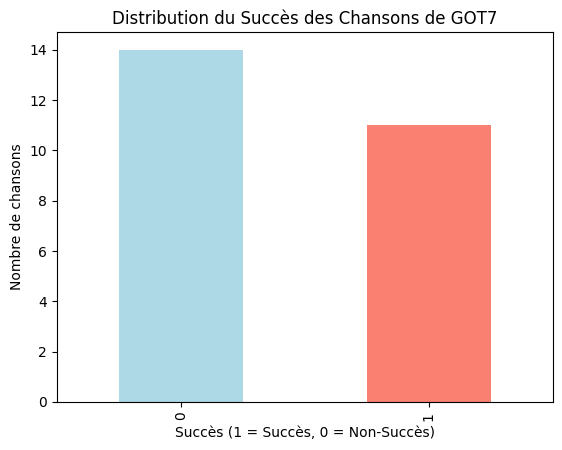

In [82]:
df_got7['Succes'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribution du Succès des Chansons de GOT7')
plt.xlabel('Succès (1 = Succès, 0 = Non-Succès)')
plt.ylabel('Nombre de chansons')
plt.show()

### 💚 Descente de Gradient

Dans ce modèle, nous allons utiliser les features (Durée, BPM, Vues YouTube, Mentions RS, et Title Track) pour prédire la probabilité qu'une chanson soit un succès. Le modèle de régression logistique est couramment utilisé pour des prédictions binaires (0 ou 1)

**1. Définir la fonction de coût pour la régression logistique**
La fonction de coût de la régression logistique est donnée par :

$$J(w) = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)$$

où :
- **$N$** est le nombre d'échantillons.
- **$y_i$** est la vraie étiquette pour l’échantillon $i$.
- **$\hat{y}_i$** est la prédiction du modèle pour l’échantillon $i$, définie par $\hat{y}_i = \sigma(w \cdot X_i) = \frac{1}{1 + e^{-w \cdot X_i}}$



**2. Calculer le gradient de la fonction de coût**
Le gradient par rapport aux poids 
$w$ est :

$$\frac{\partial J}{\partial w} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i) X_i$$

In [29]:
# Sigmoïde
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Fonction de coût (J(w))
def J(w, X, y):
    N = X.shape[0]
    y_pred = sigmoid(X.dot(w))
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
     

# Gradient de la fonction coût
def gradient_J(w, X, y):
    N = X.shape[0]
    y_pred = sigmoid(X.dot(w))
    return (1 / N) * X.T.dot(y_pred - y)

In [30]:
## Initialisation des poids

def initialize_weight(X, type):
    D = X.shape[1]
    if type == "random":
        w = (np.random.random(D) - 0.5) / np.sqrt(D)
    if type == "normal":
        w = np.random.normal(0, 1/np.sqrt(D), D)
    return w

In [31]:
# Descente de gradient
def descente_de_gradient(X, y, eta, itermax):
    w = initialize_weight(X, "normal")
    ths = np.zeros(itermax) ## TABLEAU DE COUT
    for i in range(itermax):
        w = w - eta * gradient_J(w, X, y)
        ths[i] = J(w, X, y)
    return ths, w

In [32]:
from sklearn.preprocessing import StandardScaler

## Nous devons normaliser les données pour la descente de gradient 
# (pour garantir que toutes les features soient sur une échelle comparable).

# Extraction des données
X = df_got7[["Duree_s", "BPM", "Vues_YouTube_M", "Mentions_RS_K", "Title_Track"]].values
y = df_got7["Succes"].values

# Normalisation des données
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Ajout d'une colonne de biais pour w_0 (intercept)
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]


In [33]:
# On entraine les données :

# Paramètres de la descente de gradient
eta = 0.01
itermax = 10

# Entraînement du modèle
w_o, couts = descente_de_gradient(X_normalized, y, eta, itermax)

print("les poids optimisé :",w_o)
print("\n")
print("les coûts :", couts)


les poids optimisé : [0.67888661 0.67779309 0.67670434 0.67562034 0.67454107 0.67346651
 0.67239664 0.67133144 0.67027088 0.66921495]


les coûts : [ 0.00214382 -0.1574374   0.54130468 -0.10754864  0.23621985 -0.17547252]


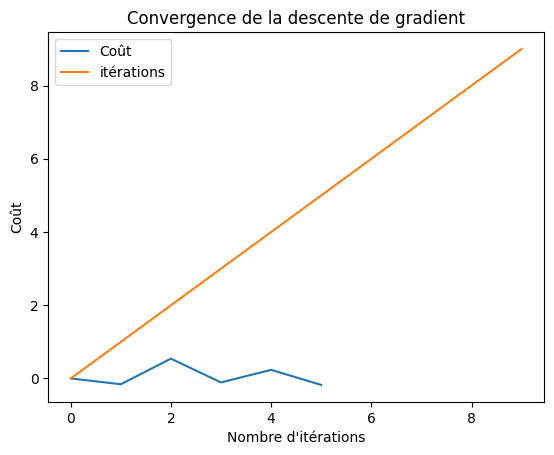

In [34]:
## Visualisation sur une courbe

import matplotlib.pyplot as plt

# Affichage de la courbe de coût
plt.plot(couts, label="Coût")
plt.plot(range(itermax), label="itérations")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient")
plt.legend()
plt.show()


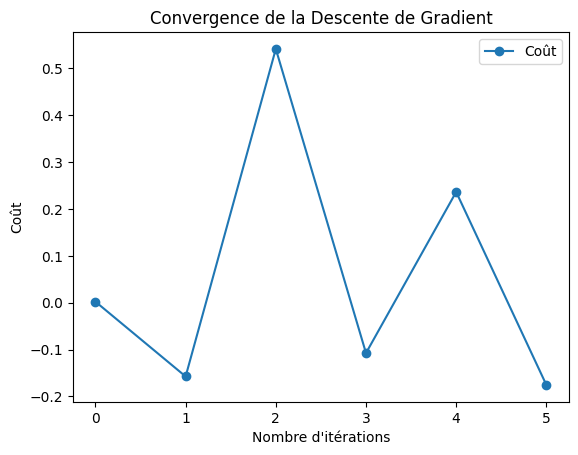

In [83]:
# Affichage de la courbe de coût
plt.plot(couts, label="Coût", marker='o')
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût")
plt.title("Convergence de la Descente de Gradient")
plt.legend()
plt.show()


In [35]:
# Fonction de prédiction
def predict(X, w):
    w = initialize_weight(X, "normal")
    return (sigmoid(X.dot(w)) >= 0.5).astype(int)

# Prédictions sur l'ensemble de test
y_pred = predict(X_normalized, w_o)

# Taux de précision
accuracy = np.mean(y_pred == y)
print(f"Précision du modèle : {accuracy * 100:.2f}%")


Précision du modèle : 52.00%


______________
### 💚 Perceptron 
Entraîne un modèle Perceptron pour classifier les chansons en Succès = 1 et Succès = 0.

In [36]:
# Séparation initiale en (train+validation) et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Étape 2 : Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# Étape 3 : Création et entraînement du modèle
model_perceptron_sk = Perceptron(max_iter=1000, random_state=42)

def perceptron_opti(X, y, eta, itermax) :
    N = X.shape[0]
    D = X.shape[1]
    w0 = initialize_weight(X,"normal")
    for i in range(itermax):
        malclasse = ((X@w0)* y <= 0)
        w0 -= -eta/N * (y[malclasse] @ X[malclasse])
    return w0

model_perceptron = perceptron_opti(X, y, 0.01, 20)


In [39]:
model_perceptron_sk.fit(X_train, y_train)
y_pred = model_perceptron_sk.predict(X_test)

In [40]:
display(y_pred)
display(model_perceptron)


array([0, 1, 0, 0, 0])

array([ 0.36120954,  0.60900118,  1.13591361,  1.5108982 , -0.03757138])

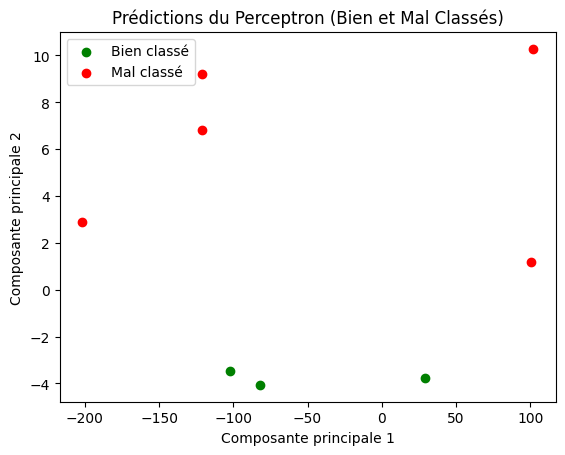

In [84]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron

# Réduction de dimension pour affichage (PCA en 2D)
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Entraînement et prédiction
model_perceptron_sk = Perceptron(max_iter=1000, random_state=42)
model_perceptron_sk.fit(X_train_2D, y_train)
y_pred = model_perceptron_sk.predict(X_test_2D)

# Identification des prédictions correctes et incorrectes
correct = (y_pred == y_test)
incorrect = ~correct

# Affichage des points
plt.scatter(X_test_2D[correct, 0], X_test_2D[correct, 1], color='green', label='Bien classé')
plt.scatter(X_test_2D[incorrect, 0], X_test_2D[incorrect, 1], color='red', label='Mal classé')
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Prédictions du Perceptron (Bien et Mal Classés)")
plt.legend()
plt.show()


### 💚 PCA et SVM :
Utilise PCA pour réduire la dimensionnalité des données (si nécessaire) tout en conservant les caractéristiques les plus importantes.
Entraîne un SVM (Support Vector Machine) pour classifier les chansons en succès ou non-succès.

In [66]:
# Séparation initiale en (train+validation) et test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Séparation de (train+validation) en train et validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Vérification des tailles
print("Entraînement :", X_train.shape, y_train.shape)
print("Validation :", X_val.shape, y_val.shape)
print("Test :", X_test.shape, y_test.shape)

Entraînement : (13, 5) (13,)
Validation : (4, 5) (4,)
Test : (8, 5) (8,)


In [90]:
# Transformation des données :
X_train_transform = preproc.transform(X_train)
X_valid_transform = preproc.transform(X_val)

# Init et entrainement du SVM
clf_lineair = sklearn.svm.SVC(kernel="linear", C=1, random_state=42)
clf_poly = sklearn.svm.SVC(kernel="poly", C=1, random_state=42)
clf_sig = sklearn.svm.SVC(kernel="sigmoid", C=1, random_state=42)

clf_lineair.fit(X_train_transform, y_train)
clf_poly.fit(X_train_transform, y_train)
clf_sig.fit(X_train_transform, y_train)

trainscore = clf_lineair.score(X_train_transform, y_train)
validscore = clf_lineair.score(X_valid_transform, y_val)
print("Train score : ", trainscore, "Valid score : ", validscore)

Train score :  1.0 Valid score :  0.5


*remarque : il n'est pas obligatoire d'utiliser la PCA car mes données sont déja réduite, il serait préférable de le faire sur plus de 10 caractéristiques sur les données car elle simplifie les calculs et peut améliorer la performance du modèle en réduisant le risque de sur-apprentissage.*

In [ ]:
import sklearn.decomposition
import sklearn.svm

# la ou va stocker les scores pour par la suite les afficher
linear_train_score = []
linear_valid_score = []

nComp_range = np.arange(1, X_train.shape[1] + 1)
for nC in nComp_range:
    # init de la PCA avec nC composantes principales
    preproc = sklearn.decomposition.PCA(n_components=nC)
    preproc.fit(X_train)

    # Transformation des données :
    X_train_transform = preproc.transform(X_train)
    X_valid_transform = preproc.transform(X_val)

    # Init et entrainement du SVM
    clf_lineair = sklearn.svm.SVC(kernel="linear", C=1, random_state=42)
    clf_poly = sklearn.svm.SVC(kernel="poly", C=1, random_state=42)
    clf_sig = sklearn.svm.SVC(kernel="sigmoid", C=1, random_state=42)

    clf_lineair.fit(X_train_transform, y_train)
    clf_poly.fit(X_train_transform, y_train)
    clf_sig.fit(X_train_transform, y_train)

    trainscore = clf_lineair.score(X_train_transform, y_train)
    validscore = clf_lineair.score(X_valid_transform, y_val)
    print("nombre de composant : ", nC, "Train score : ", trainscore, "Valid score : ", validscore)

linear_train_score.append(trainscore)
linear_valid_score.append(validscore)



nombre de composant :  1 Train score :  0.6153846153846154 Valid score :  0.5
nombre de composant :  2 Train score :  0.6153846153846154 Valid score :  0.5
nombre de composant :  3 Train score :  0.9230769230769231 Valid score :  0.25
nombre de composant :  4 Train score :  1.0 Valid score :  0.5
nombre de composant :  5 Train score :  1.0 Valid score :  0.5


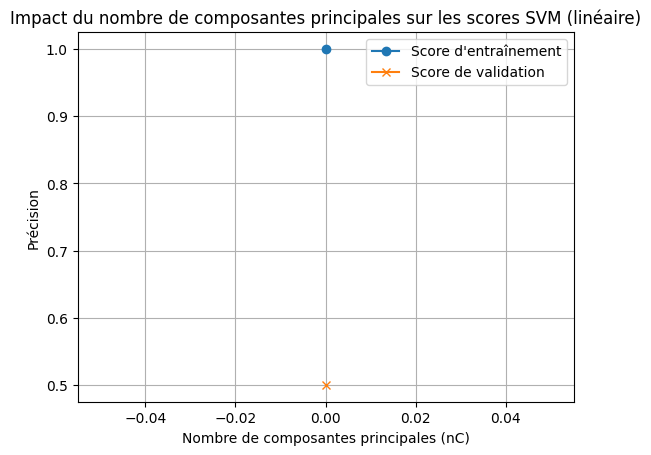

In [86]:
# Affichage des scores avec un graphique
plt.plot(linear_train_score, label="Score d'entraînement", marker='o')
plt.plot(linear_valid_score, label="Score de validation", marker='x')
plt.xlabel("Nombre de composantes principales (nC)")
plt.ylabel("Précision")
plt.title("Impact du nombre de composantes principales sur les scores SVM (linéaire)")
plt.legend()
plt.grid()
plt.show()

meilleur NC 1 meilleur score 0.5


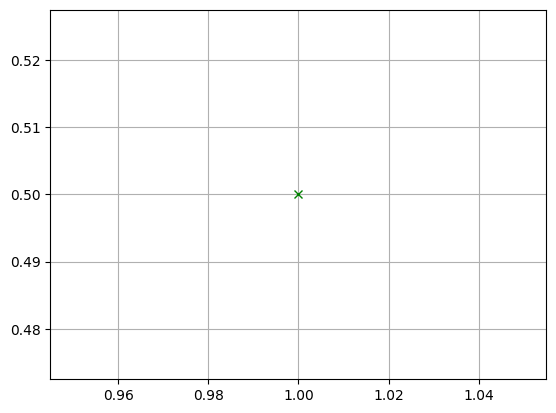

In [87]:
# Affichage aec l'indice du meilleur choix

bestIndex = np.argmax(linear_train_score) 
bestnC = nComp_range[bestIndex]
plt.plot(bestnC, linear_valid_score[bestIndex], marker="x", color="green")
print("meilleur NC", bestnC, "meilleur score", linear_valid_score[bestIndex])
plt.grid()

### 💚 Validation Croisée et Hyperparamètres
 Effectue une validation croisée pour évaluer la performance du modèle avec différents hyperparamètres (comme le taux d’apprentissage pour la descente de gradient ou C pour le SVM).

In [71]:
# Cross validation
# ?sklearn.model_selection.cross_validate

In [78]:
# ?np.logspace
# ?plt.errorbar

In [77]:
plage_de_valeurs_pour_C = np.logspace(-6,2, num=9)## attention, les valeurs dans les arguments de np.logspace sont à modifier !!
nombreDePlisDeCV = 5
trainScore = np.zeros((plage_de_valeurs_pour_C.shape[0], nombreDePlisDeCV))
validScore = np.zeros((plage_de_valeurs_pour_C.shape[0], nombreDePlisDeCV))
for i, C in enumerate(plage_de_valeurs_pour_C):
    monModele = sklearn.svm.LinearSVC(C=C,max_iter=1000, dual = False)
    myCV = sklearn.model_selection.cross_validate(monModele, \
                X_train, y_train, \
                cv = nombreDePlisDeCV, return_train_score=True)
    trainScore[i] = myCV['train_score']
    validScore[i] = myCV['test_score']

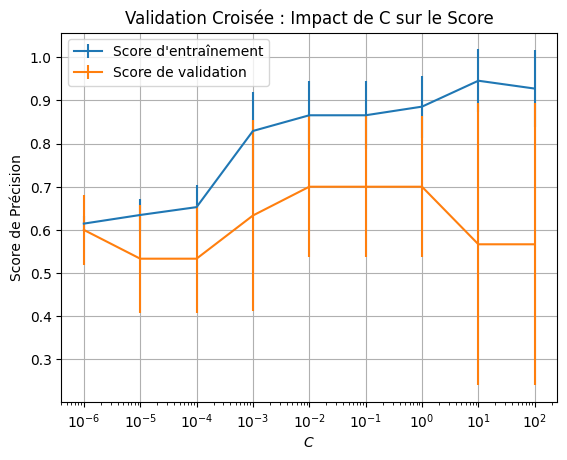

In [ ]:
# Plot des scores de validation croisée avec l'hyperparamètre C
plt.figure()
plt.errorbar(plage_de_valeurs_pour_C, np.mean(trainScore, axis=1), label="Score d'entraînement", yerr=np.std(trainScore, axis=1))
plt.errorbar(plage_de_valeurs_pour_C, np.mean(validScore, axis=1), label="Score de validation", yerr=np.std(validScore, axis=1))
plt.xlabel(r"$C$")
plt.ylabel("Score de Précision")
plt.title("Validation Croisée : Impact de C sur le Score")
plt.legend()
plt.xscale("log")
plt.grid()
plt.show()



#### Analyses de ce graphique
- **score d'entrainement** : le modele s'adapte bien aux données
- **score de validation** : On voit qu'un C trop élevé mène à du surajustement
- **meilleure valeur** : se situe entre $10^{-2}$ ou $10^{-1}$

### 💚 Analyse des Résultats et Overfitting 

**Courbes d’apprentissage** : Observe l’évolution de la perte (ou score de validation) par rapport au nombre d’itérations ou d’époques pour détecter les signes d’overfitting.
**Nombre optimal d’époques** : Détermine le nombre d’époques où le modèle généralise le mieux en observant la convergence des courbes de validation et d’entraînement.

#### 💚 Conclusion

En analysant le succès des chansons de GOT7, nous avons obtenu des résultats intéressants :

- **SVM et PCA** : La combinaison de SVM et PCA a montré que l'optimisation du nombre de composantes principales est essentielle pour une meilleure précision. Avec un petit nombre de composantes, les scores de validation sont plus stables. la PCA sur ce projet est inutile ici...
- **Perceptron** : performant mais, le Perceptron est sensible aux données bruitées, et les erreurs de classification sont plus fréquentes.
- **Validation Croisée** : La validation croisée a permis de trouver une valeur optimale pour l'hyperparamètre `C` du SVM.
  
En conclusion, les techniques de réduction de dimension et d'optimisation des hyperparamètres se sont révélées efficaces pour prédire le succès des chansons de GOT7. Ce projet peut être amélioré avec plus de données et des caractéristiques supplémentaires pour augmenter encore la précision des modèles.
